In [55]:
import pandas as pd
import numpy as np
from datetime import datetime

In [56]:
stock_price_data = pd.read_csv('historical_stock_prices.csv')
stock_data = pd.read_csv('historical_stocks.csv')

In [64]:
print(stock_price_data.shape)
print(stock_data.shape)

(20973889, 8)
(6460, 5)


In [65]:
stock_price_data.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [66]:
stock_data.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [67]:
stock_data.isnull().sum()

ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64

In [68]:
# merging both datasets
stocks = pd.merge(stock_price_data,
                  stock_data,
                  left_on='ticker',
                  right_on='ticker')

In [69]:
stocks.head()

,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE


In [70]:
print(stocks.shape)
print(stocks.isnull().sum())

(20973889, 12)
ticker             0
open               0
close              0
adj_close          0
low                0
high               0
volume             0
date               0
exchange           0
name               0
sector       2549449
industry     2549449
dtype: int64


In [71]:
stocks['date'] = pd.to_datetime(stocks['date'])

In [72]:
# narrowing to a specific data range
mask = (stocks['date'] >= '2017-08-24') & (stocks['date'] <= '2018-08-24')
stocks2018 = stocks.loc[mask]

In [73]:
stocks2018 = stocks2018.reset_index(drop=True)

In [74]:
print(stocks2018.shape)
stocks2018.head()

(1368161, 12)


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
0,AHH,13.40,13.32,12.613926,13.31,13.50,300200,2017-08-24,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
1,AHH,13.39,13.40,12.689686,13.22,13.47,335100,2017-08-25,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2,AHH,13.40,13.22,12.519227,13.20,13.47,275300,2017-08-28,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
3,AHH,13.25,13.25,12.547638,13.19,13.33,213600,2017-08-29,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
4,AHH,13.21,13.36,12.651806,13.16,13.38,316200,2017-08-30,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE


In [75]:
stocks2018.isnull().sum()

ticker            0
open              0
close             0
adj_close         0
low               0
high              0
volume            0
date              0
exchange          0
name              0
sector       216246
industry     216246
dtype: int64

In [76]:
# removing duplicates
df_distinct = stocks2018.drop_duplicates(['ticker','industry'])[['ticker','industry']]

In [77]:
df_distinct.head()

,ticker,industry
0,AHH,REAL ESTATE
253,APO,INVESTMENT MANAGERS
506,PEZ,NaN
753,CRCM,OTHER CONSUMER SERVICES
1006,GTN,BROADCASTING


In [78]:
print(df_distinct.isnull().sum())
df_distinct.shape

ticker        0
industry    917
dtype: int64


(5685, 2)

In [79]:
df_industryCounts = pd.DataFrame(df_distinct['industry'].value_counts())
df_industryCounts.columns = ['counts']
df_industryCounts.index.name = 'industry'
df_industryCounts.reset_index()

,industry,counts
0,MAJOR PHARMACEUTICALS,398
1,MAJOR BANKS,328
2,REAL ESTATE INVESTMENT TRUSTS,216
3,BUSINESS SERVICES,155
4,INDUSTRIAL MACHINERY/COMPONENTS,154
...,...,...
130,TOOLS/HARDWARE,1
131,CONSUMER: GREETING CARDS,1
132,ELECTRONICS DISTRIBUTION,1
133,DIVERSIFIED ELECTRONIC PRODUCTS,1


In [93]:
# getting the top 12 industries only
df_top12_industries = df_industryCounts.drop(df_industryCounts.index[12:])

In [94]:
df_top12_industries = df_top12_industries.reset_index()
df_top12_industries

,industry,counts
0,MAJOR PHARMACEUTICALS,398
1,MAJOR BANKS,328
2,REAL ESTATE INVESTMENT TRUSTS,216
3,BUSINESS SERVICES,155
4,INDUSTRIAL MACHINERY/COMPONENTS,154
5,OIL & GAS PRODUCTION,153
6,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,142
7,TELECOMMUNICATIONS EQUIPMENT,125
8,EDP SERVICES,116
9,SEMICONDUCTORS,104


In [95]:
stocks_top12 = pd.merge(stocks2018, df_top11_industries,
                       left_on='industry',
                       right_on='industry')
stocks_top12.shape
stocks_top12.isnull().sum()

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
exchange     0
name         0
sector       0
industry     0
counts       0
dtype: int64

In [96]:
stocks_top12.shape

(494610, 13)

In [97]:
for_drop = ['close','adj_close','low','high','volume',
            'exchange','name','sector','counts']
stocks_top12_filt = stocks_top12.drop(for_drop, axis=1)
stocks_top12_filt.head()

,ticker,open,date,industry
0,VIAV,10.23,2017-08-24,SEMICONDUCTORS
1,VIAV,10.24,2017-08-25,SEMICONDUCTORS
2,VIAV,10.13,2017-08-28,SEMICONDUCTORS
3,VIAV,10.03,2017-08-29,SEMICONDUCTORS
4,VIAV,10.09,2017-08-30,SEMICONDUCTORS


In [98]:
stocks_top12_filt.ticker = stocks_top11_filt.ticker.astype(str)
stocks_top12_filt.dtypes

ticker              object
open               float64
date        datetime64[ns]
industry            object
dtype: object

In [99]:
stocks_top12_filt.isnull().sum()

ticker      0
open        0
date        0
industry    0
dtype: int64

In [134]:
stocks_top12_filt2 = stocks_top12_filt.groupby(['ticker'])
stocks_top12_filt2 = stocks_top12_filt2.apply(lambda x: x.sort_values(by=['date','ticker']))

In [135]:
stocks_top12_filt2 = stocks_top12_filt2.reset_index(drop=True)

In [136]:
stocks_top12_filt2['Row#']=range(1,len(stocks_top11_filt['date'])+1)

In [137]:
stocks_top12_filt2.head(10)

,ticker,open,date,industry,Row#
0,AABA,66.059998,2017-08-24,EDP SERVICES,1
1,AABA,65.410004,2017-08-25,EDP SERVICES,2
2,AABA,64.430000,2017-08-28,EDP SERVICES,3
3,AABA,62.299999,2017-08-29,EDP SERVICES,4
4,AABA,63.650002,2017-08-30,EDP SERVICES,5
5,AABA,64.500000,2017-08-31,EDP SERVICES,6
6,AABA,64.169998,2017-09-01,EDP SERVICES,7
7,AABA,63.529999,2017-09-05,EDP SERVICES,8
8,AABA,63.709999,2017-09-06,EDP SERVICES,9
9,AABA,63.560001,2017-09-07,EDP SERVICES,10


In [138]:
stocks_top12_filt2.isnull().sum()

ticker      0
open        0
date        0
industry    0
Row#        0
dtype: int64

In [139]:
stocks_top12_lag = stocks_top12_filt2.copy()

In [140]:
stocks_top12_lag.head()

,ticker,open,date,industry,Row#
0,AABA,66.059998,2017-08-24,EDP SERVICES,1
1,AABA,65.410004,2017-08-25,EDP SERVICES,2
2,AABA,64.430000,2017-08-28,EDP SERVICES,3
3,AABA,62.299999,2017-08-29,EDP SERVICES,4
4,AABA,63.650002,2017-08-30,EDP SERVICES,5


In [141]:
cols = list(stocks_top12_lag.columns)
for i in range(1,2):
    col = cols[1]
    col_name = col + ('_ahead_{}'.format(i))
    stocks_top12_lag[col_name] = stocks_top12_lag[col].shift(-1)

In [142]:
stocks_top12_lag.head()

,ticker,open,date,industry,Row#,open_ahead_1
0,AABA,66.059998,2017-08-24,EDP SERVICES,1,65.410004
1,AABA,65.410004,2017-08-25,EDP SERVICES,2,64.430000
2,AABA,64.430000,2017-08-28,EDP SERVICES,3,62.299999
3,AABA,62.299999,2017-08-29,EDP SERVICES,4,63.650002
4,AABA,63.650002,2017-08-30,EDP SERVICES,5,64.500000


In [147]:
stocks_top12_lag['Row#1']=range(1,len(stocks_top11_lag['date'])+2)

In [148]:
stocks_top12_lag.shape

(494610, 7)

In [149]:
stocks_top12_lag.tail()

,ticker,open,date,industry,Row#,open_ahead_1,Row#1
494605,ZYNE,6.28,2018-08-20,MAJOR PHARMACEUTICALS,494606,6.13,494606
494606,ZYNE,6.13,2018-08-21,MAJOR PHARMACEUTICALS,494607,6.31,494607
494607,ZYNE,6.31,2018-08-22,MAJOR PHARMACEUTICALS,494608,6.40,494608
494608,ZYNE,6.40,2018-08-23,MAJOR PHARMACEUTICALS,494609,6.30,494609
494609,ZYNE,6.30,2018-08-24,MAJOR PHARMACEUTICALS,494610,NaN,494610


In [150]:
# dropping the nan row
stocks_top12_lag = stocks_top12_lag.drop([494609], axis=0)

In [153]:
stocks_top12_lag.isnull().sum()

ticker          0
open            0
date            0
industry        0
Row#            0
open_ahead_1    0
Row#1           0
dtype: int64

In [154]:
df_daily_return_data = stocks_top12_lag.copy()

### Engineering the stock price Daily Return as a new feature

In [155]:
cols_calc = ['open','open_ahead_1']

daily_ret = []

for i in range(0,len(df_daily_return_data)):
    z_open = df_daily_return_data.loc[i,cols_calc].tolist()
    ret = ((z_open[1]/z_open[0])*100) - 100
    daily_ret.append(ret)
df_daily_return_data['daily_return'] = daily_ret

In [157]:
df_daily_return_data.head()

,ticker,open,date,industry,Row#,open_ahead_1,Row#1,daily_return
0,AABA,66.059998,2017-08-24,EDP SERVICES,1,65.410004,1,-0.983945
1,AABA,65.410004,2017-08-25,EDP SERVICES,2,64.430000,2,-1.498247
2,AABA,64.430000,2017-08-28,EDP SERVICES,3,62.299999,3,-3.305915
3,AABA,62.299999,2017-08-29,EDP SERVICES,4,63.650002,4,2.166938
4,AABA,63.650002,2017-08-30,EDP SERVICES,5,64.500000,5,1.335426


### Outliers

In [158]:
df_group_ticker_date = df_daily_return_data.copy()
for_dropping = ['open', 'open_ahead_1', 'Row#1']
df_group_ticker_date = df_group_ticker_date.drop(for_dropping, axis=1)

In [159]:
df_group_ticker_date.head()

,ticker,date,industry,Row#,daily_return
0,AABA,2017-08-24,EDP SERVICES,1,-0.983945
1,AABA,2017-08-25,EDP SERVICES,2,-1.498247
2,AABA,2017-08-28,EDP SERVICES,3,-3.305915
3,AABA,2017-08-29,EDP SERVICES,4,2.166938
4,AABA,2017-08-30,EDP SERVICES,5,1.335426


In [160]:
df_group_ticker_date = df_group_ticker_date.groupby(['ticker', 'date'])

In [162]:
summary = df_daily_return_data.describe()
summary

,open,Row#,open_ahead_1,Row#1,daily_return
count,494609.000000,494609.000000,494609.000000,494609.000000,4.946090e+05
mean,37.826036,247305.000000,37.825915,247305.000000,4.419359e+01
std,116.120385,142781.463984,116.120387,142781.463984,1.087728e+04
min,0.030000,1.000000,0.030000,1.000000,-9.999707e+01
25%,8.229000,123653.000000,8.225000,123653.000000,-1.085267e+00
50%,21.000000,247305.000000,21.000000,247305.000000,0.000000e+00
75%,43.189999,370957.000000,43.189999,370957.000000,1.146499e+00
max,21500.000000,494609.000000,21500.000000,494609.000000,3.392757e+06


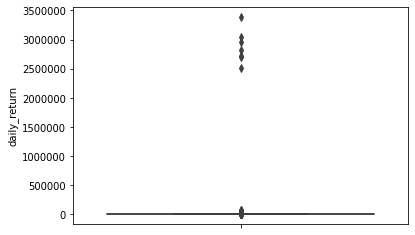

In [163]:
import seaborn as sns
sns.boxplot(y = df_daily_return_data['daily_return'])

#### Outlier Handling

In [167]:
# statistical outlier boundaries
Q1 = df_daily_return_data['daily_return'].quantile(0.25)
Q3 = df_daily_return_data['daily_return'].quantile(0.75)
max_open = Q3+(Q3-Q1)*1.5
min_open = Q1-(Q3-Q1)*1.5

In [168]:
def check_outlier(z):
    if z > max_open or z < min_open:
        out_dr = 1
    else:
        out_dr = 0
    return out_dr

outliers_dr = []
df_daily_return_data['daily_return'].apply(lambda x: outliers_dr.append(check_outlier(x)))
df_daily_return_data['isOutlierDailyReturn'] = outliers_dr

In [169]:
new_dr=[]
def check_out(val):
    if val > max_open:
        new_dr.append(max_open)
    elif val < min_open:
        new_dr.append(min_open)
    else:
        new_dr.append(val)

df_daily_return_data['daily_return'].apply(lambda x: check_out(x))
df_daily_return_data['daily_return_new'] = new_dr


In [170]:
from collections import Counter
print(Counter(df_daily_return_data['isOutlierDailyReturn']))

Counter({0: 444826, 1: 49783})


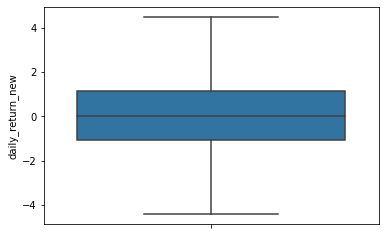

In [171]:
sns.boxplot(y = df_daily_return_data['daily_return_new'])

In [172]:
df_daily_return_data.describe()

,open,Row#,open_ahead_1,Row#1,daily_return,isOutlierDailyReturn,daily_return_new
count,494609.000000,494609.000000,494609.000000,494609.000000,4.946090e+05,494609.000000,494609.000000
mean,37.826036,247305.000000,37.825915,247305.000000,4.419359e+01,0.100651,0.030582
std,116.120385,142781.463984,116.120387,142781.463984,1.087728e+04,0.300867,2.115762
min,0.030000,1.000000,0.030000,1.000000,-9.999707e+01,0.000000,-4.432915
25%,8.229000,123653.000000,8.225000,123653.000000,-1.085267e+00,0.000000,-1.085267
50%,21.000000,247305.000000,21.000000,247305.000000,0.000000e+00,0.000000,0.000000
75%,43.189999,370957.000000,43.189999,370957.000000,1.146499e+00,0.000000,1.146499
max,21500.000000,494609.000000,21500.000000,494609.000000,3.392757e+06,1.000000,4.494147


### Keeping only the daily return

In [177]:
to_drop = ['open', 'open_ahead_1', 'Row#1', 'daily_return', 'Row#', 'isOutlierDailyReturn']
df_daily_return_data = df_daily_return_data.drop(to_drop, axis=1)
df_daily_return_data.head()

,ticker,date,industry,daily_return_new
0,AABA,2017-08-24,EDP SERVICES,-0.983945
1,AABA,2017-08-25,EDP SERVICES,-1.498247
2,AABA,2017-08-28,EDP SERVICES,-3.305915
3,AABA,2017-08-29,EDP SERVICES,2.166938
4,AABA,2017-08-30,EDP SERVICES,1.335426


In [179]:
df_daily_return_data.isnull().sum()

ticker              0
date                0
industry            0
daily_return_new    0
dtype: int64

### Dates pivoted to become the columns

In [180]:
df_daily_return = pd.pivot_table(df_daily_return_data, index=['ticker','industry'],columns='date',values='daily_return_new')

In [181]:
df_daily_return = df_daily_return.reset_index(drop=False)

In [71]:
df_daily_return.isnull().sum()

date
ticker                   0
industry                 0
2017-08-24 00:00:00    205
2017-08-25 00:00:00    211
2017-08-28 00:00:00    202
2017-08-29 00:00:00    205
2017-08-30 00:00:00    204
2017-08-31 00:00:00    193
2017-09-01 00:00:00    202
2017-09-05 00:00:00    198
2017-09-06 00:00:00    189
2017-09-07 00:00:00    194
2017-09-08 00:00:00    196
2017-09-11 00:00:00    193
2017-09-12 00:00:00    193
2017-09-13 00:00:00    189
2017-09-14 00:00:00    193
2017-09-15 00:00:00    188
2017-09-18 00:00:00    185
2017-09-19 00:00:00    192
2017-09-20 00:00:00    201
2017-09-21 00:00:00    206
2017-09-22 00:00:00    200
2017-09-25 00:00:00    193
2017-09-26 00:00:00    194
2017-09-27 00:00:00    191
2017-09-28 00:00:00    199
2017-09-29 00:00:00    195
2017-10-02 00:00:00    183
2017-10-03 00:00:00    184
                      ... 
2018-07-16 00:00:00     74
2018-07-17 00:00:00     64
2018-07-18 00:00:00     69
2018-07-19 00:00:00     69
2018-07-20 00:00:00     79
2018-07-23 00:00:00    

In [182]:
cols_z = df_daily_return.columns[2:].tolist()
df_daily_return.loc[:,cols_z] = df_daily_return.loc[:,cols_z].ffill(axis=1).bfill(axis=1)
df_daily_return.shape

(2068, 255)

In [184]:
df_daily_return.head()

date,ticker,industry,2017-08-24 00:00:00,2017-08-25 00:00:00,2017-08-28 00:00:00,2017-08-29 00:00:00,2017-08-30 00:00:00,2017-08-31 00:00:00,2017-09-01 00:00:00,2017-09-05 00:00:00,...,2018-08-13 00:00:00,2018-08-14 00:00:00,2018-08-15 00:00:00,2018-08-16 00:00:00,2018-08-17 00:00:00,2018-08-20 00:00:00,2018-08-21 00:00:00,2018-08-22 00:00:00,2018-08-23 00:00:00,2018-08-24 00:00:00
0,AABA,EDP SERVICES,-0.983945,-1.498247,-3.305915,2.166938,1.335426,-0.511631,-0.997350,0.283331,...,-1.757099,-4.432915,2.659417,-0.103032,1.429193,1.205697,0.889914,3.158346,-4.432915,-4.432915
1,AAOI,SEMICONDUCTORS,-3.719710,-0.865664,-2.926910,4.494147,-3.312203,-2.884770,-1.451478,-3.476621,...,1.279926,-3.463608,0.630299,-3.854489,0.350788,0.998755,0.494439,2.632225,3.307759,-4.432915
2,AAON,INDUSTRIAL MACHINERY/COMPONENTS,-0.156737,0.000000,-0.156989,0.471703,1.408453,0.925924,-0.152903,-0.459423,...,0.772209,1.404851,0.755666,0.249996,2.493766,3.041363,0.590319,0.938971,-3.837213,-2.321642
3,AAT,REAL ESTATE INVESTMENT TRUSTS,0.371383,0.789343,-1.321588,-0.297616,0.348257,0.644517,0.418724,-0.269808,...,-0.725385,0.991652,0.542633,0.282705,1.204514,0.379837,-0.403632,-0.278624,-0.203195,-4.432915
4,AAV,OIL & GAS PRODUCTION,-0.775189,0.781246,-2.325576,0.793646,-0.787397,1.587300,0.781246,-1.550386,...,0.000000,1.612909,-4.432915,1.724136,1.694914,-1.666665,1.694914,1.666665,0.000000,4.494147


In [188]:
df_daily_return.isnull().sum().sum()

0

In [191]:
df_daily_return = df_daily_return.reset_index(drop=True)

In [192]:
df_daily_return = pd.DataFrame(df_daily_return)
df_daily_return.head()

date,ticker,industry,2017-08-24 00:00:00,2017-08-25 00:00:00,2017-08-28 00:00:00,2017-08-29 00:00:00,2017-08-30 00:00:00,2017-08-31 00:00:00,2017-09-01 00:00:00,2017-09-05 00:00:00,...,2018-08-13 00:00:00,2018-08-14 00:00:00,2018-08-15 00:00:00,2018-08-16 00:00:00,2018-08-17 00:00:00,2018-08-20 00:00:00,2018-08-21 00:00:00,2018-08-22 00:00:00,2018-08-23 00:00:00,2018-08-24 00:00:00
0,AABA,EDP SERVICES,-0.983945,-1.498247,-3.305915,2.166938,1.335426,-0.511631,-0.997350,0.283331,...,-1.757099,-4.432915,2.659417,-0.103032,1.429193,1.205697,0.889914,3.158346,-4.432915,-4.432915
1,AAOI,SEMICONDUCTORS,-3.719710,-0.865664,-2.926910,4.494147,-3.312203,-2.884770,-1.451478,-3.476621,...,1.279926,-3.463608,0.630299,-3.854489,0.350788,0.998755,0.494439,2.632225,3.307759,-4.432915
2,AAON,INDUSTRIAL MACHINERY/COMPONENTS,-0.156737,0.000000,-0.156989,0.471703,1.408453,0.925924,-0.152903,-0.459423,...,0.772209,1.404851,0.755666,0.249996,2.493766,3.041363,0.590319,0.938971,-3.837213,-2.321642
3,AAT,REAL ESTATE INVESTMENT TRUSTS,0.371383,0.789343,-1.321588,-0.297616,0.348257,0.644517,0.418724,-0.269808,...,-0.725385,0.991652,0.542633,0.282705,1.204514,0.379837,-0.403632,-0.278624,-0.203195,-4.432915
4,AAV,OIL & GAS PRODUCTION,-0.775189,0.781246,-2.325576,0.793646,-0.787397,1.587300,0.781246,-1.550386,...,0.000000,1.612909,-4.432915,1.724136,1.694914,-1.666665,1.694914,1.666665,0.000000,4.494147


In [193]:
for_drop3 = ['ticker', 'industry']
df_remove_categorical = df_daily_return.drop(for_drop3, axis=1)
df_remove_categorical.shape

(2068, 253)

In [194]:
print(df_remove_categorical.isnull().sum().sum())
print(df_remove_categorical.shape)

0
(2068, 253)


In [195]:
df_remove_categorical.shape

(2068, 253)

In [196]:
from sklearn.decomposition import PCA

In [197]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(df_remove_categorical)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

#### Principal Components 1, 2 and 3 hold the most information variance, therefore will be effective for a 3D plot of the PCA analysis (supervised structure of the data)

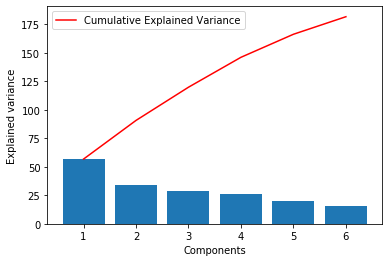

In [201]:
import matplotlib.pyplot as plt

plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

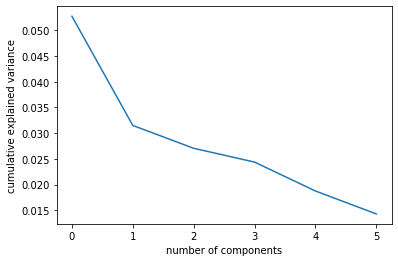

In [202]:
# explained variance plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

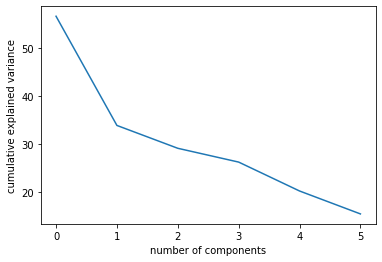

In [203]:
# scree plot
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [204]:
principalDf['industry'] = df_daily_return.industry

In [205]:
principalDf.shape

(2068, 7)

In [206]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,industry
0,-3.870544,-9.240624,-7.554323,-1.127509,-4.641027,-3.891854,EDP SERVICES
1,3.506837,-3.523401,-6.728581,0.765889,-4.537232,-5.703369,SEMICONDUCTORS
2,-1.625468,2.346474,-3.070205,5.078597,1.302842,0.222585,INDUSTRIAL MACHINERY/COMPONENTS
3,2.704869,7.941227,-1.139557,1.307887,-3.455969,7.619581,REAL ESTATE INVESTMENT TRUSTS
4,6.485009,-4.086918,18.857513,6.222047,-1.919378,-1.365063,OIL & GAS PRODUCTION


In [207]:
principalDf.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
industry    0
dtype: int64

#### 2-component PCA plot

In [209]:
from ggplot import *

from altair import Chart

chart = Chart(principalDf)
chart.mark_circle().encode(
    x='PC1',
    y='PC2',
    color='industry'
)

alt.Chart(...)

In [210]:
df_remove_categorical['label'] = df_daily_return.industry

In [211]:
df_remove_categorical['label'] = df_remove_categorical.label.astype("category").cat.codes

In [212]:
df_remove_categorical.head()

date,2017-08-24 00:00:00,2017-08-25 00:00:00,2017-08-28 00:00:00,2017-08-29 00:00:00,2017-08-30 00:00:00,2017-08-31 00:00:00,2017-09-01 00:00:00,2017-09-05 00:00:00,2017-09-06 00:00:00,2017-09-07 00:00:00,...,2018-08-14 00:00:00,2018-08-15 00:00:00,2018-08-16 00:00:00,2018-08-17 00:00:00,2018-08-20 00:00:00,2018-08-21 00:00:00,2018-08-22 00:00:00,2018-08-23 00:00:00,2018-08-24 00:00:00,label
0,-0.983945,-1.498247,-3.305915,2.166938,1.335426,-0.511631,-0.997350,0.283331,-0.235438,0.251730,...,-4.432915,2.659417,-0.103032,1.429193,1.205697,0.889914,3.158346,-4.432915,-4.432915,2
1,-3.719710,-0.865664,-2.926910,4.494147,-3.312203,-2.884770,-1.451478,-3.476621,3.832505,-4.340398,...,-3.463608,0.630299,-3.854489,0.350788,0.998755,0.494439,2.632225,3.307759,-4.432915,10
2,-0.156737,0.000000,-0.156989,0.471703,1.408453,0.925924,-0.152903,-0.459423,0.769231,-3.053435,...,1.404851,0.755666,0.249996,2.493766,3.041363,0.590319,0.938971,-3.837213,-2.321642,3
3,0.371383,0.789343,-1.321588,-0.297616,0.348257,0.644517,0.418724,-0.269808,0.024590,-0.024584,...,0.991652,0.542633,0.282705,1.204514,0.379837,-0.403632,-0.278624,-0.203195,-4.432915,9
4,-0.775189,0.781246,-2.325576,0.793646,-0.787397,1.587300,0.781246,-1.550386,-1.574802,2.400002,...,1.612909,-4.432915,1.724136,1.694914,-1.666665,1.694914,1.666665,0.000000,4.494147,7


In [213]:
principalDf = pd.DataFrame(principalDf)

#### 3-component PCA plot

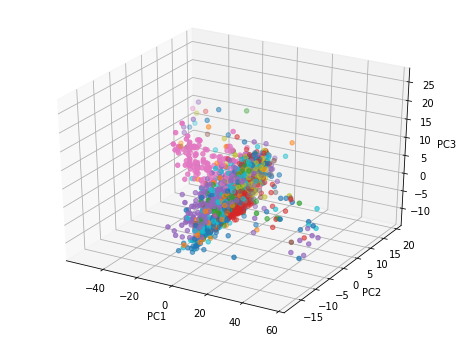

In [214]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(8,6)).gca(projection='3d')
ax.scatter(
    xs=principalDf['PC1'],#principalDf['PC1'], 
    ys=principalDf['PC2'], 
    zs=principalDf['PC3'],
    c=df_remove_categorical['label'],
    cmap='tab10'
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [222]:
df_daily_return['industry'].value_counts()

MAJOR PHARMACEUTICALS                      398
MAJOR BANKS                                328
REAL ESTATE INVESTMENT TRUSTS              216
BUSINESS SERVICES                          155
INDUSTRIAL MACHINERY/COMPONENTS            154
OIL & GAS PRODUCTION                       153
COMPUTER SOFTWARE: PREPACKAGED SOFTWARE    142
TELECOMMUNICATIONS EQUIPMENT               125
EDP SERVICES                               116
SEMICONDUCTORS                             104
PROPERTY-CASUALTY INSURERS                  92
MEDICAL/DENTAL INSTRUMENTS                  85
Name: industry, dtype: int64

In [223]:
df_remove_categorical = df_remove_categorical.drop('label',axis=1)

In [224]:
df_remove_categorical.head()

date,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-05,2017-09-06,2017-09-07,...,2018-08-13,2018-08-14,2018-08-15,2018-08-16,2018-08-17,2018-08-20,2018-08-21,2018-08-22,2018-08-23,2018-08-24
0,-0.983945,-1.498247,-3.305915,2.166938,1.335426,-0.511631,-0.997350,0.283331,-0.235438,0.251730,...,-1.757099,-4.432915,2.659417,-0.103032,1.429193,1.205697,0.889914,3.158346,-4.432915,-4.432915
1,-3.719710,-0.865664,-2.926910,4.494147,-3.312203,-2.884770,-1.451478,-3.476621,3.832505,-4.340398,...,1.279926,-3.463608,0.630299,-3.854489,0.350788,0.998755,0.494439,2.632225,3.307759,-4.432915
2,-0.156737,0.000000,-0.156989,0.471703,1.408453,0.925924,-0.152903,-0.459423,0.769231,-3.053435,...,0.772209,1.404851,0.755666,0.249996,2.493766,3.041363,0.590319,0.938971,-3.837213,-2.321642
3,0.371383,0.789343,-1.321588,-0.297616,0.348257,0.644517,0.418724,-0.269808,0.024590,-0.024584,...,-0.725385,0.991652,0.542633,0.282705,1.204514,0.379837,-0.403632,-0.278624,-0.203195,-4.432915
4,-0.775189,0.781246,-2.325576,0.793646,-0.787397,1.587300,0.781246,-1.550386,-1.574802,2.400002,...,0.000000,1.612909,-4.432915,1.724136,1.694914,-1.666665,1.694914,1.666665,0.000000,4.494147


In [225]:
from sklearn.cluster import KMeans

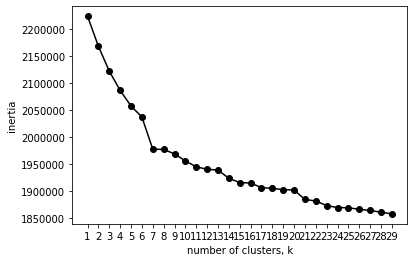

In [226]:
ks = range(1, 30)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, max_iter=20, random_state=25)
    
    # Fit model to samples
    model.fit(df_remove_categorical)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [231]:
import random
random.seed()
Km = KMeans(n_clusters=11, max_iter=20, random_state=25).fit(df_remove_categorical)

In [337]:
df_cluster_centroids = pd.DataFrame(Km.cluster_centers_)
df_cluster_label = pd.DataFrame(Km.labels_)

In [338]:
df_cluster_label.columns = ['cluster']

In [339]:
df_cluster_centroids.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.265653,-0.322636,-0.610640,1.164275,1.210277,0.921717,-0.246779,0.075742,-0.083857,0.103595,...,-0.334252,-0.329946,0.030425,-0.153651,0.772563,0.380400,0.581387,0.859260,0.501586,-3.778949
1,1.904003,-0.287972,0.316100,1.404230,0.921976,1.329135,-0.050811,0.265936,-0.014619,1.065620,...,-0.497865,-0.648823,-1.139516,0.616006,0.256898,-0.474675,1.341172,1.374414,-0.520254,0.990754
2,3.721782,4.078865,3.721782,4.078865,3.721782,3.721782,4.258631,4.258631,4.258631,4.258631,...,-0.058543,0.132465,0.714293,1.128009,0.963744,1.188601,0.833942,1.065070,0.316157,-0.862090
3,0.248774,0.157565,-0.491203,0.180679,0.409143,0.135501,0.045135,-0.133061,0.105856,-0.017054,...,-0.301008,-0.341477,-0.194291,0.016817,0.323915,0.144279,0.307411,0.267246,0.200821,1.618019
4,4.494147,4.494147,-4.432915,3.461534,-3.451936,2.310231,1.290321,-2.133760,1.963334,-2.021272,...,-0.480003,-1.607716,0.653594,-1.948050,-3.476822,-4.432915,4.150939,0.253622,-3.451391,4.494147


In [340]:
df_cluster_label.shape

(2068, 1)

In [341]:
pc1 = pd.DataFrame(principalDf['PC1'])
pc2 = pd.DataFrame(principalDf['PC2'])
np.array
print(pc1.head())
import pylab as pl

        PC1
0 -3.870544
1  3.506837
2 -1.625468
3  2.704869
4  6.485009


In [342]:
principalDf['PC1'].shape

(2068,)

#### 2-component PCA k-means cluster-analysis plot

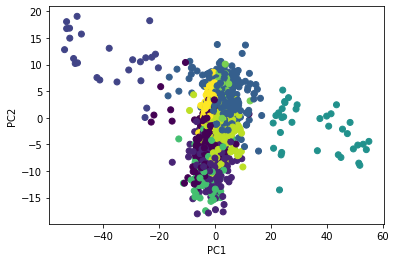

In [343]:
pl.figure('Cluster K-Means')
pl.scatter(principalDf['PC1'], principalDf['PC2'], c=df_cluster_label['cluster'])
pl.xlabel('PC1')
pl.ylabel('PC2')
pl.show()

#### 3-component PCA k-means cluster-analysis plot

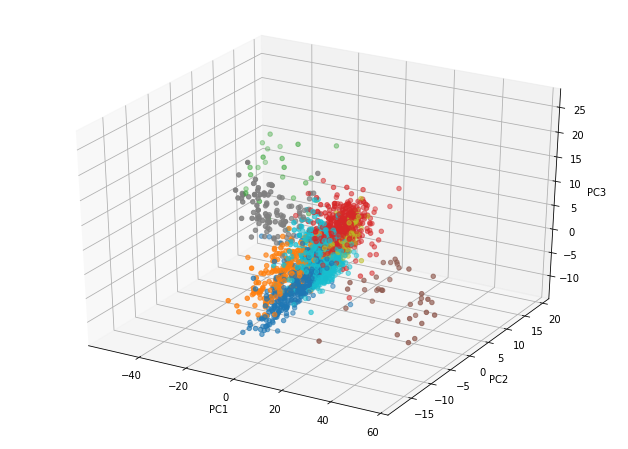

In [344]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(11,8)).gca(projection='3d')
ax.scatter(
    xs=principalDf['PC1'], 
    ys=principalDf['PC2'], 
    zs=principalDf['PC3'],
    c=df_cluster_label['cluster'], 
    cmap='tab10'
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [345]:
df_cluster_label.shape

(2068, 1)

In [346]:
df_remove_categorical.columns = df_remove_categorical.columns.astype(str)

In [347]:
df_remove_categorical.columns

Index(['2017-08-24 00:00:00', '2017-08-25 00:00:00', '2017-08-28 00:00:00',
       '2017-08-29 00:00:00', '2017-08-30 00:00:00', '2017-08-31 00:00:00',
       '2017-09-01 00:00:00', '2017-09-05 00:00:00', '2017-09-06 00:00:00',
       '2017-09-07 00:00:00',
       ...
       '2018-08-14 00:00:00', '2018-08-15 00:00:00', '2018-08-16 00:00:00',
       '2018-08-17 00:00:00', '2018-08-20 00:00:00', '2018-08-21 00:00:00',
       '2018-08-22 00:00:00', '2018-08-23 00:00:00', '2018-08-24 00:00:00',
       'cluster'],
      dtype='object', name='date', length=254)

In [348]:
df_remove_categorical['cluster'] = df_cluster_label['cluster']

In [349]:
df_combined = df_remove_categorical.copy()

In [350]:
df_daily_return.industry.shape

(2068,)

In [351]:
df_combined['industry'] = df_daily_return.industry

In [352]:
df_cluster_centroids['cluster'] = df_cluster_label.cluster

In [353]:
df_moving_avg = df_combined.copy()
df_moving_avg = df_moving_avg.drop(['cluster', 'industry'], axis=1)
df_moving_avg.head()

date,2017-08-24 00:00:00,2017-08-25 00:00:00,2017-08-28 00:00:00,2017-08-29 00:00:00,2017-08-30 00:00:00,2017-08-31 00:00:00,2017-09-01 00:00:00,2017-09-05 00:00:00,2017-09-06 00:00:00,2017-09-07 00:00:00,...,2018-08-13 00:00:00,2018-08-14 00:00:00,2018-08-15 00:00:00,2018-08-16 00:00:00,2018-08-17 00:00:00,2018-08-20 00:00:00,2018-08-21 00:00:00,2018-08-22 00:00:00,2018-08-23 00:00:00,2018-08-24 00:00:00
0,-0.983945,-1.498247,-3.305915,2.166938,1.335426,-0.511631,-0.997350,0.283331,-0.235438,0.251730,...,-1.757099,-4.432915,2.659417,-0.103032,1.429193,1.205697,0.889914,3.158346,-4.432915,-4.432915
1,-3.719710,-0.865664,-2.926910,4.494147,-3.312203,-2.884770,-1.451478,-3.476621,3.832505,-4.340398,...,1.279926,-3.463608,0.630299,-3.854489,0.350788,0.998755,0.494439,2.632225,3.307759,-4.432915
2,-0.156737,0.000000,-0.156989,0.471703,1.408453,0.925924,-0.152903,-0.459423,0.769231,-3.053435,...,0.772209,1.404851,0.755666,0.249996,2.493766,3.041363,0.590319,0.938971,-3.837213,-2.321642
3,0.371383,0.789343,-1.321588,-0.297616,0.348257,0.644517,0.418724,-0.269808,0.024590,-0.024584,...,-0.725385,0.991652,0.542633,0.282705,1.204514,0.379837,-0.403632,-0.278624,-0.203195,-4.432915
4,-0.775189,0.781246,-2.325576,0.793646,-0.787397,1.587300,0.781246,-1.550386,-1.574802,2.400002,...,0.000000,1.612909,-4.432915,1.724136,1.694914,-1.666665,1.694914,1.666665,0.000000,4.494147


In [354]:
# creating a moving average mean of the dataset as a new dataframe for use later in the custom visualisation
df_moving_avg = df_moving_avg.rolling(window=7, axis=1).mean()

In [355]:
df_combined['industry'] = df_combined['industry'].astype(str)

In [356]:
cols_strp = df_combined.columns.tolist()
new_strp = []
for i in cols_strp:
    i=i.strip(' 00:00:00')
    new_strp.append(i)
df_combined.columns = new_strp
print(df_combined.columns)

Index(['2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29', '2017-08-3',
       '2017-08-31', '2017-09-01', '2017-09-05', '2017-09-06', '2017-09-07',
       ...
       '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-2', '2018-08-21',
       '2018-08-22', '2018-08-23', '2018-08-24', 'cluster', 'industry'],
      dtype='object', length=255)


In [357]:
dates = df_combined.columns[:253].tolist()

dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

In [358]:
dates_final = []
thresh = 30
for i, val in enumerate(dates):
    if i % thresh == 0:
        dates_final.append(val)
    else:
        dates_final.append(' ')

In [359]:
print(dates_final)

['2017-08-24', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2017-10-06', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2017-11-17', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2018-01-03', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2018-02-15', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2018-04-02', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '2018-05-14', ' ', ' ', ' ', ' ', ' ', ' ', '

In [360]:
df_remove_categorical.loc[0, :'2017-08-30 00:00:00'].tolist()

[-0.9839447782417352,
 -1.4982469073018763,
 -3.305915036514733,
 2.1669378898087075,
 1.3354256932350665]

In [361]:
df_combined.loc[0, 'cluster':'industry'].tolist()

[0, 'EDP SERVICES']

In [362]:
dats = []
for i in range(0, 253):
    dats.append(0)

In [363]:
df_combined.columns = df_combined.columns.astype(str)

In [364]:
df_combined.head()

,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-3,2017-08-31,2017-09-01,2017-09-05,2017-09-06,2017-09-07,...,2018-08-15,2018-08-16,2018-08-17,2018-08-2,2018-08-21,2018-08-22,2018-08-23,2018-08-24,cluster,industry
0,-0.983945,-1.498247,-3.305915,2.166938,1.335426,-0.511631,-0.997350,0.283331,-0.235438,0.251730,...,2.659417,-0.103032,1.429193,1.205697,0.889914,3.158346,-4.432915,-4.432915,0,EDP SERVICES
1,-3.719710,-0.865664,-2.926910,4.494147,-3.312203,-2.884770,-1.451478,-3.476621,3.832505,-4.340398,...,0.630299,-3.854489,0.350788,0.998755,0.494439,2.632225,3.307759,-4.432915,0,SEMICONDUCTORS
2,-0.156737,0.000000,-0.156989,0.471703,1.408453,0.925924,-0.152903,-0.459423,0.769231,-3.053435,...,0.755666,0.249996,2.493766,3.041363,0.590319,0.938971,-3.837213,-2.321642,10,INDUSTRIAL MACHINERY/COMPONENTS
3,0.371383,0.789343,-1.321588,-0.297616,0.348257,0.644517,0.418724,-0.269808,0.024590,-0.024584,...,0.542633,0.282705,1.204514,0.379837,-0.403632,-0.278624,-0.203195,-4.432915,8,REAL ESTATE INVESTMENT TRUSTS
4,-0.775189,0.781246,-2.325576,0.793646,-0.787397,1.587300,0.781246,-1.550386,-1.574802,2.400002,...,-4.432915,1.724136,1.694914,-1.666665,1.694914,1.666665,0.000000,4.494147,7,OIL & GAS PRODUCTION


#### Custom code created to visualise the companies in the same cluster in the same subplot where the different graph colours represent different industries with the moving average in black. Here clusters 1 and 3 only are visualised from 50 data samples for the sake of visual clarity. Not all of the first 50 data row samples will contain only clusters 1 and 3 so the number of graphs will be less than 50 depending on how many companies in the first 50 data samples are in clusters 1 and 3. Clusters 1 and 3 were chosen as it was observed that they are frequent in the first 50 data samples.

8
9
11
14
15
18
20
21
22
29
30
31
32
33
39
41
45
47


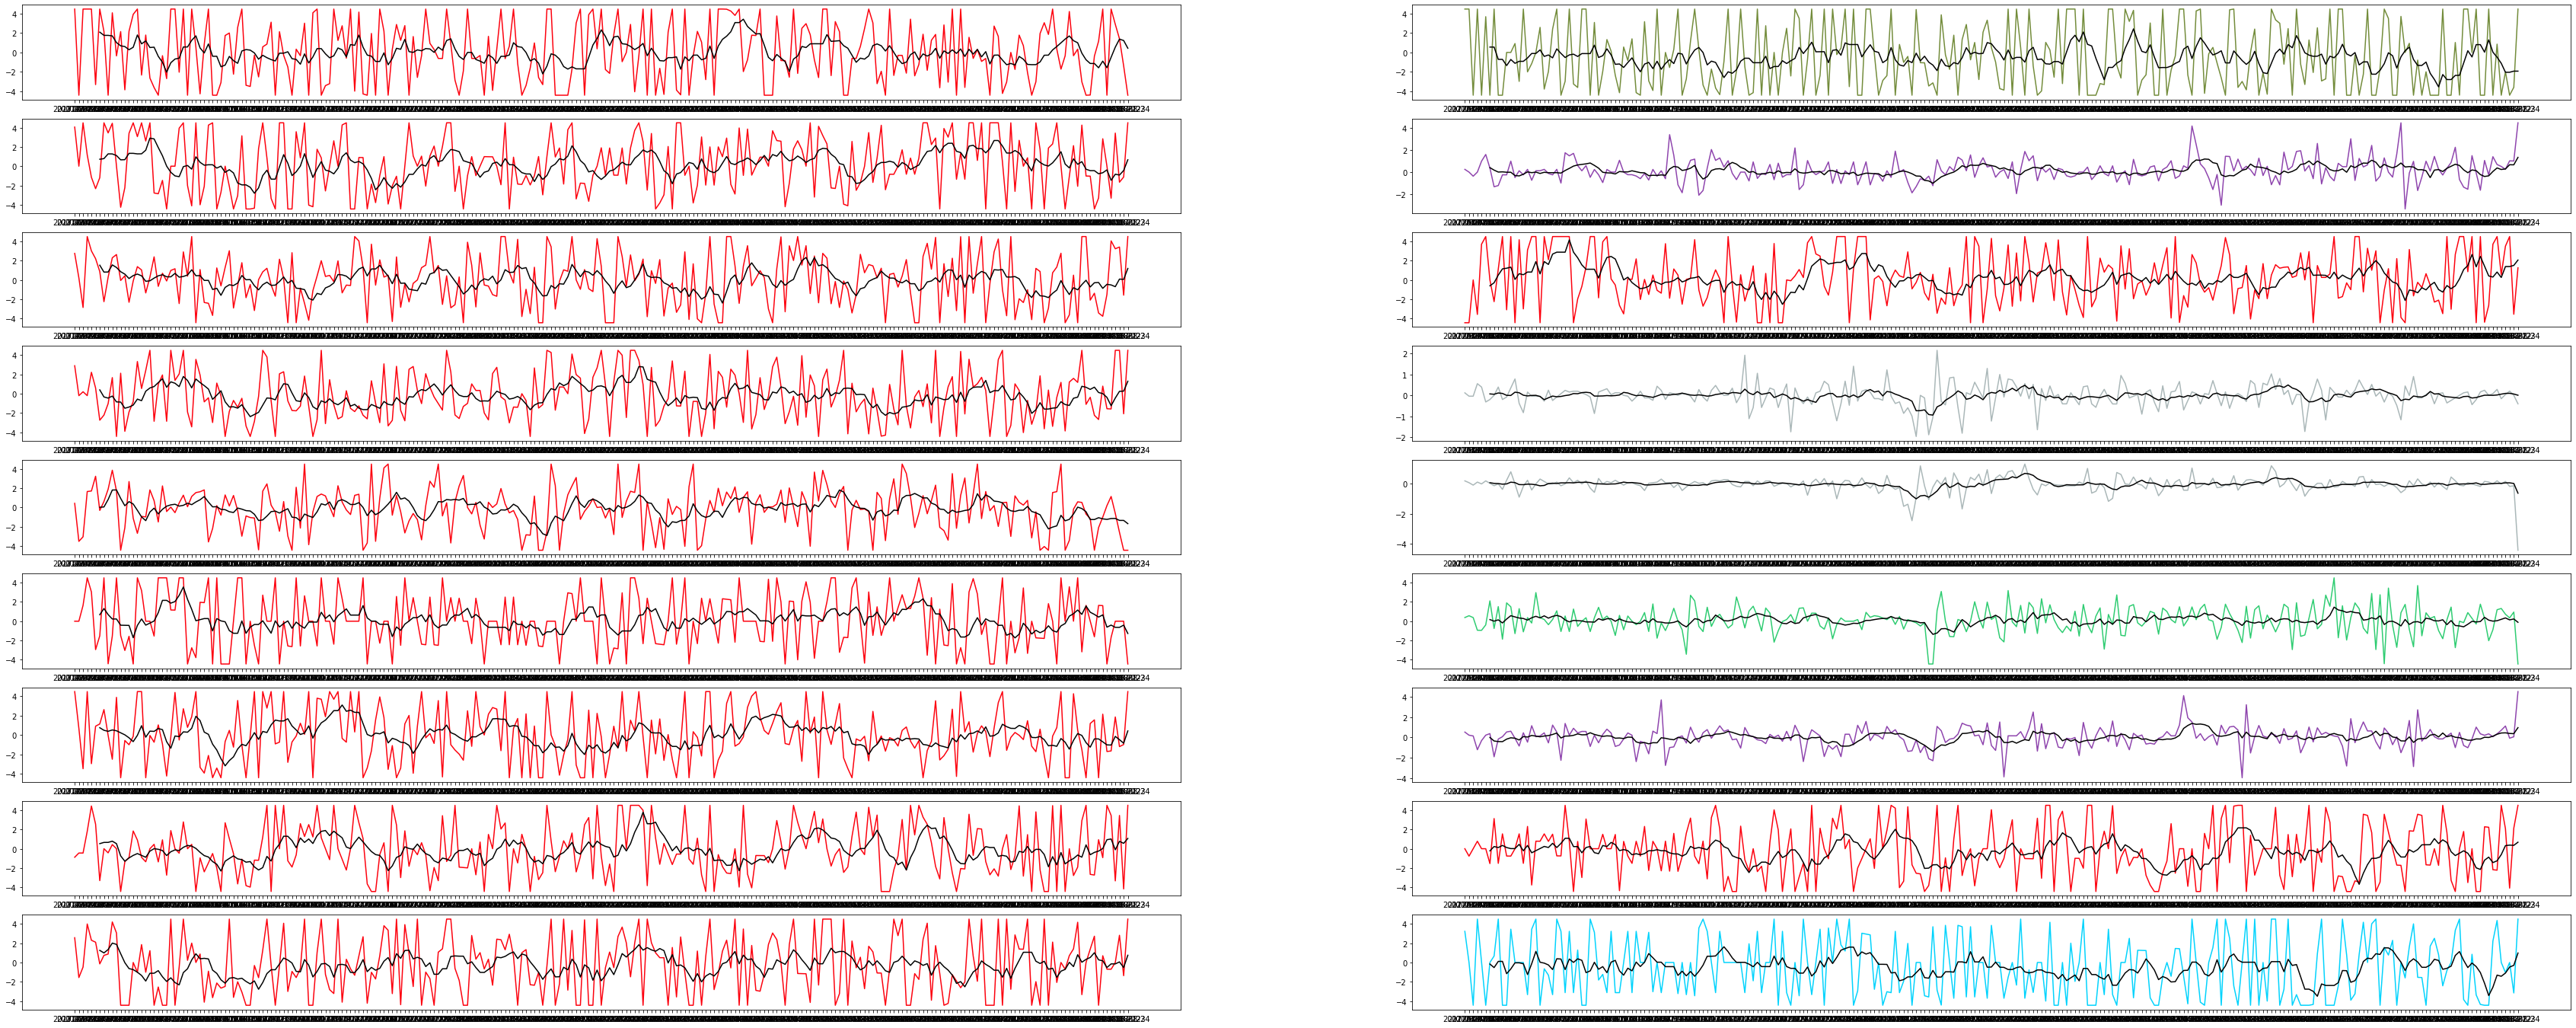

In [365]:
color_dict = {'MAJOR PHARMACEUTICALS': '#FD010E', 'MAJOR BANKS': '#2ECC71', 'REAL ESTATE INVESTMENT TRUSTS': '#8E44AD','BUSINESS SERVICES': '#0159FD', 'INDUSTRIAL MACHINERY/COMPONENTS': '#01D3FD', \
'OIL & GAS PRODUCTION': '#1ABC9C', 'COMPUTER SOFTWARE: PREPACKAGED SOFTWARE': '#27AE60', 'TELECOMMUNICATIONS EQUIPMENT': '#738C3B', 'EDP SERVICES': '#F1C40F', 'SEMICONDUCTORS': '#E67E22', 'PROPERTY-CASUALTY INSURERS': '#AAB7B8', \
'MEDICAL/DENTAL INSTRUMENTS': '#FD01B6'}

fig = plt.figure(figsize=(60,60))
gs = gridspec.GridSpec(22,2) 
axs = []
z = 0
k = 0
for i in range(0,50):
    daily_return_loc = df_combined.loc[i, :'2018-08-24'].tolist()
    check_loc = df_combined.loc[i, 'cluster':'industry'].tolist()
    weekly_moving_avg = df_moving_avg.loc[i, :'2018-08-24 00:00:00'].tolist()
    if check_loc[0] == 1:
        if i != z+1 and i!=0:
            sub_row = z+1
            axs.append(fig.add_subplot(gs[sub_row, 0]))
            axs[-1].plot(dates, daily_return_loc, color = color_dict[check_loc[1]])
            axs[-1].plot(dates, weekly_moving_avg, color = 'black')
            #axs[-1].locator_params(axis='x', nbins=3)$
        else:
            axs.append(fig.add_subplot(gs[i, 0]))
            axs[-1].plot(dates, daily_return_loc, color = color_dict[check_loc[1]])
            axs[-1].plot(dates, weekly_moving_avg, color = 'black')
            #axs[-1].locator_params(axis='x', nbins=3)
        z = z+1
        print(i)
    elif check_loc[0] == 3:
        if i != k+1 and i!=0:
            sub_row2 = k+1
            axs.append(fig.add_subplot(gs[sub_row2, 1]))
            axs[-1].plot(dates, daily_return_loc, color = color_dict[check_loc[1]])
            axs[-1].plot(dates, weekly_moving_avg, color = 'black')
            #axs[-1].locator_params(axis='x', nbins=3)
        else:
            axs.append(fig.add_subplot(gs[i, 1]))
            axs[-1].plot(dates, daily_return_loc, color = color_dict[check_loc[1]])
            axs[-1].plot(dates, weekly_moving_avg, color = 'black')
            #axs[-1].locator_params(axis='x', nbins=3)
        k = k+1
        print(i)
    else:
        continue

plt.show()

Shown graphs are the stock price daily return from 2017-08-24 to 2018-08-24. On the left is cluster 1 and on the right is cluster 3.

As is seen in cluster 1 on the left all the companies are in the same industry (red colour) in the first 50 data samples, however cluster 3 is a bit different with companies from different industries clustered together. If a closer look is taken at the moving average sequence (in black) in cluster 3 on the right, a pattern across different companies is noticed. There is a homogeneous drop in the daily return sequence with-in a very similar time-frame, and a more coherent sequence drop when the identical industries are looked at (i.e. identical colour). But in general there are drops and climbs of the daily return in very similar time-frames with companies in the same cluster regardless of the industry. This again is noticed when the moving averages are closely looked at in comparison.